# Lecture 3

#### WS edition

In [1]:
import networkx as nx

# Parameters
n = 500  # number of nodes
k = 4  # each node is joined with its k nearest neighbors
p_values = [0, 0.1, 1]  # rewiring probability values

# Generate WS graphs and compute average shortest path length
average_shortest_paths = {}

for p in p_values:
    # Generate Watts-Strogatz graph
    G = nx.watts_strogatz_graph(n, k, p)
    # Compute the average shortest path length
    avg_shortest_path = nx.average_shortest_path_length(G)
    average_shortest_paths[p] = avg_shortest_path

# Print results
for p, avg_path_length in average_shortest_paths.items():
    print(f"Rewiring probability p = {p}: Average shortest path length ⟨d⟩ = {avg_path_length:.2f}")


Rewiring probability p = 0: Average shortest path length ⟨d⟩ = 62.88
Rewiring probability p = 0.1: Average shortest path length ⟨d⟩ = 8.19
Rewiring probability p = 1: Average shortest path length ⟨d⟩ = 4.75


Describe what happens to the network when p=1

When p=1 in the Watts-Strogatz model, the network undergoes complete random rewiring. This means that every edge in the network is randomly rewired, resulting in a graph that behaves like a random network.

Generate a lot of networks with different values of p
. You will notice that paths are short when p
 is close to one and they are long when p=0
. What's the value of p
 for which the average shortest path length gets close to the short paths we find in a fully randomized network.

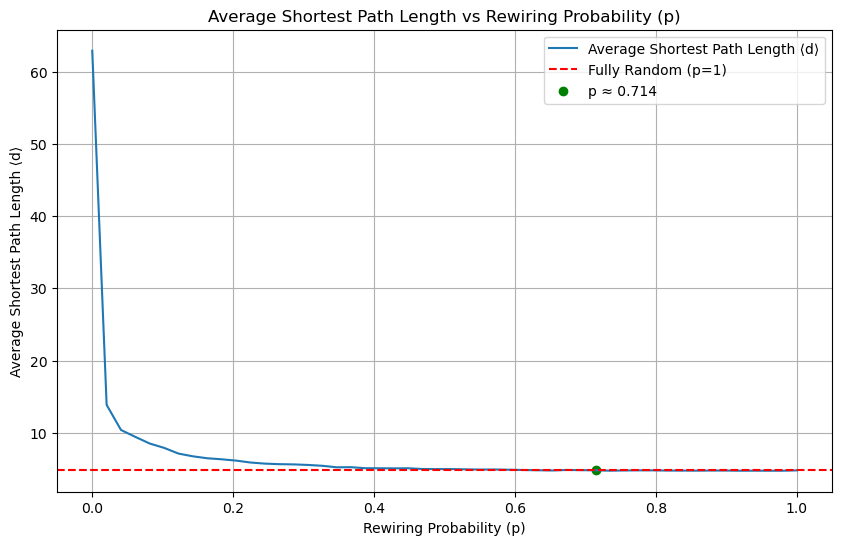

The value of p where the average shortest path length gets close to that of a fully randomized network is approximately p = 0.714.


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 500  # number of nodes
k = 4  # each node is joined with its k nearest neighbors
p_values = np.linspace(0, 1, 50)  # 50 values of p between 0 and 1

# Store the results
average_shortest_paths = []
p_for_randomized = 1.0  # we will compare to the average shortest path for p = 1

# Compute average shortest path length for each value of p
for p in p_values:
    # Generate Watts-Strogatz graph
    G = nx.watts_strogatz_graph(n, k, p)
    # Compute the average shortest path length
    avg_shortest_path = nx.average_shortest_path_length(G)
    average_shortest_paths.append(avg_shortest_path)

# Calculate the average shortest path for a fully random network (p = 1)
fully_random_avg_path = average_shortest_paths[-1]  # This is the last value when p = 1

# Find the smallest value of p where the average shortest path length is close to the random network
threshold = 0.01  # Define a threshold for "closeness"
p_close_to_random = p_values[np.where(np.abs(np.array(average_shortest_paths) - fully_random_avg_path) < threshold)[0][0]]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(p_values, average_shortest_paths, label="Average Shortest Path Length ⟨d⟩")
plt.axhline(y=fully_random_avg_path, color='r', linestyle='--', label="Fully Random (p=1)")
plt.scatter(p_close_to_random, fully_random_avg_path, color='g', label=f"p ≈ {p_close_to_random:.3f}")
plt.xlabel("Rewiring Probability (p)")
plt.ylabel("Average Shortest Path Length ⟨d⟩")
plt.title("Average Shortest Path Length vs Rewiring Probability (p)")
plt.legend()
plt.grid(True)
plt.show()

# Print the result
print(f"The value of p where the average shortest path length gets close to that of a fully randomized network is approximately p = {p_close_to_random:.3f}.")


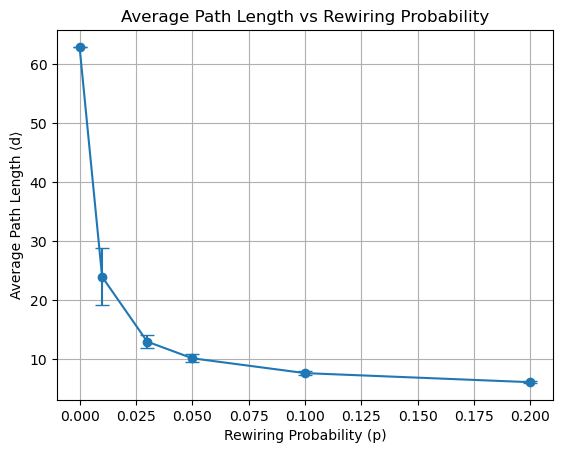

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 500  # Number of nodes
k = 4    # Average degree (each node is connected to k nearest neighbors)
p_values = [0, 0.01, 0.03, 0.05, 0.1, 0.2]  # Rewiring probabilities
num_networks = 50  # Number of networks to generate for each p

# Lists to store the results
avg_path_lengths = []
std_devs = []

# Generate networks for each p and calculate the average path length and standard deviation
for p in p_values:
    path_lengths = []
    
    for _ in range(num_networks):
        # Generate a Watts-Strogatz small-world network
        G = nx.watts_strogatz_graph(N, k, p)
        
        # Calculate the average shortest path length for the network
        avg_path_length = nx.average_shortest_path_length(G)
        path_lengths.append(avg_path_length)
    
    # Calculate the mean and standard deviation of the path lengths
    mean_path_length = np.mean(path_lengths)
    std_dev = np.std(path_lengths)
    
    avg_path_lengths.append(mean_path_length)
    std_devs.append(std_dev)

# Plotting the results with error bars
plt.errorbar(p_values, avg_path_lengths, yerr=std_devs, fmt='o-', capsize=5)
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Path Length ⟨d⟩')
plt.title('Average Path Length vs Rewiring Probability')
plt.grid(True)
plt.show()


This plot shows the relationship between the rewiring probability 𝑝 and the average path length 
⟨d⟩ in a Watts-Strogatz small-world network with 

N=500 nodes and an average degree ⟨k⟩=4. The plot is based on 50 networks generated for each rewiring probability, and error bars indicate the standard deviation of the average path lengths. 

As 𝑝 increases from 0 (a regular lattice) to 0.2 (increased randomization), the average path length decreases rapidly, demonstrating the "small-world" phenomenon where a small fraction of random rewiring leads to a significant reduction in the path length, enhancing network connectivity. 

This effect is most noticeable even for low rewiring probabilities, where only minimal random rewiring significantly reduces the average path length.

Question 1: What are the three slope-dependent regimes of complex networks with power-law degree distributions?

The three slope-dependent regimes of complex networks with power-law degree distributions are:

1. **Scale-free regime**: This regime occurs when the slope of the degree distribution is between 2 and 3. Networks in this regime are characterized by a small number of highly connected hubs and a large number of nodes with low connectivity.
   
2. **Critical regime**: When the slope equals 3, the network transitions between a scale-free and an exponential-like regime. The tail of the degree distribution decays more slowly than in an exponential network.
   
3. **Exponential regime**: This regime occurs when the slope is greater than 3. In this case, the degree distribution decays exponentially, meaning there are very few highly connected nodes, and most nodes have similar connectivity.


Question 2: What are the three regimes we find in non-linear preferential attachment?

The three regimes of non-linear preferential attachment are:

1. **Sub-linear regime**: In this regime, new nodes connect to existing nodes less than proportionally to their degree (the exponent is less than 1). As a result, hubs grow, but not as quickly as in the linear regime, and the network becomes more egalitarian.
   
2. **Linear regime**: When the attachment probability is directly proportional to the degree (exponent equals 1), the network exhibits a scale-free property, where a few highly connected hubs dominate, while most nodes have low degrees.
   
3. **Super-linear regime**: In this regime, new nodes connect to existing nodes more than proportionally to their degree (the exponent is greater than 1). Hubs grow extremely fast, leading to a network dominated by a few super hubs, with the rest of the nodes having very few connections.


Barabási-Albert Model Implementation

In this section, we will create our own Barabási-Albert (BA) model step by step. 

1. We will begin by creating a graph with a single link.
2. We will then add new nodes, connecting them to existing nodes with a probability proportional to the degree of those nodes.
3. The network will first grow to 100 nodes, and later we will extend it to 5000 nodes.
4. Finally, we will analyze the degree distribution by binning the degree values and plotting the distribution in both linear and log-log scales.


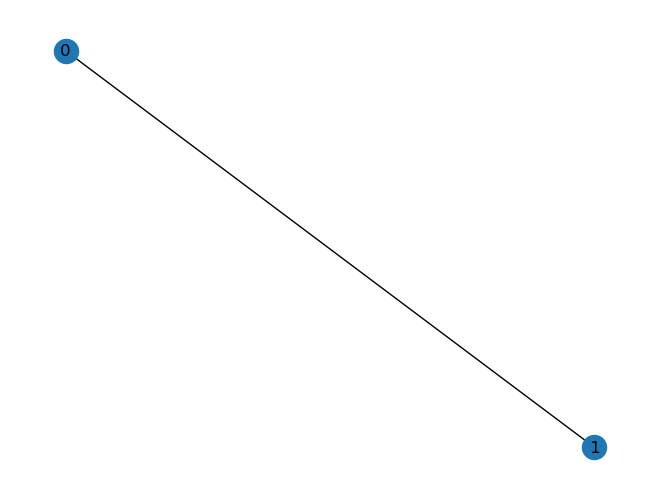

In [4]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Initialize the graph with two nodes and one edge
G = nx.Graph()
G.add_edge(0, 1)

# Plot the initial graph
nx.draw(G, with_labels=True)
plt.show()


Now, we will add nodes to the network. Each new node connects to an existing node with a probability proportional to the degree of the existing nodes. We will continue this process until the network has 100 nodes.



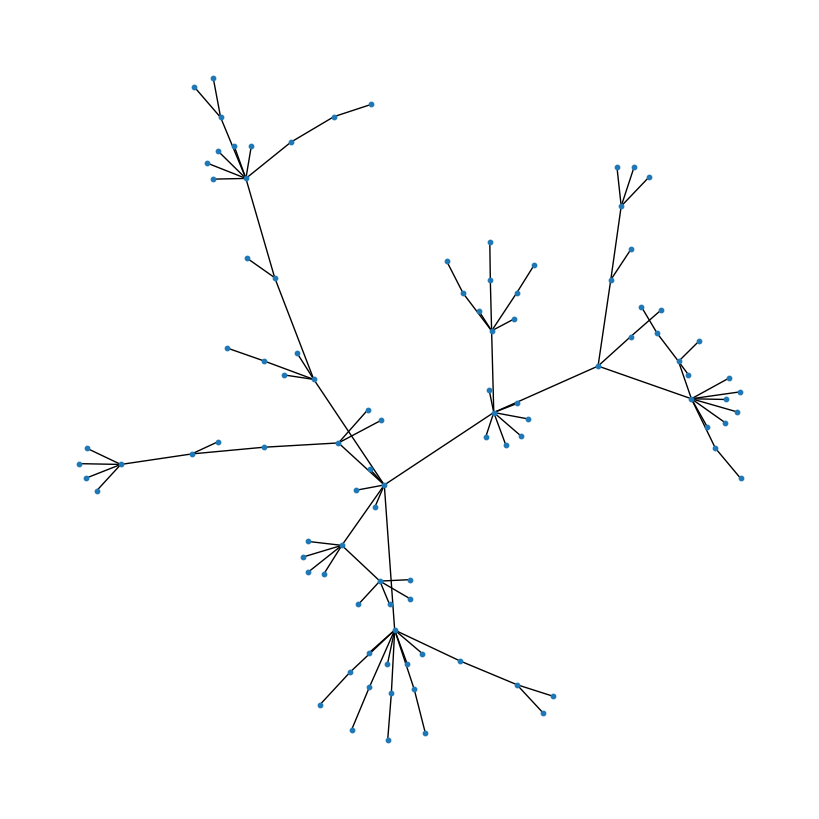

In [6]:
def add_node_with_preferential_attachment(G):
    # Create a list of nodes proportional to their degree (flattening the edges)
    degrees = list(G.degree())
    nodes = [node for node, degree in degrees for _ in range(degree)]
    
    # Select an existing node with probability proportional to degree
    new_node = max(G.nodes) + 1  # Get a new node ID
    target_node = random.choice(nodes)
    
    # Add the new node with an edge to the target node
    G.add_edge(new_node, target_node)

# Add nodes until we have 100 nodes
for _ in range(98):  # Already 2 nodes exist, so we add 98 more
    add_node_with_preferential_attachment(G)

# Plot the resulting graph
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=10, with_labels=False)
plt.show()


Next, we will continue the growth process until the network has 5000 nodes. This will demonstrate the scale-free nature of the BA model.


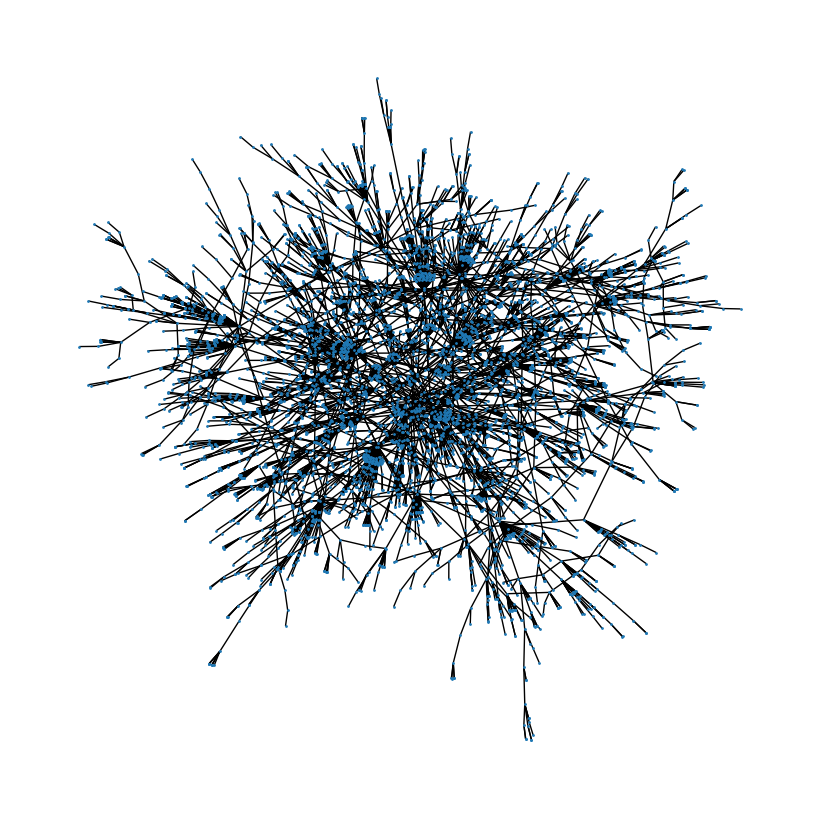

In [7]:
# Add nodes until we have 5000 nodes
for _ in range(4900):  # Already 100 nodes, so we add 4900 more
    add_node_with_preferential_attachment(G)

# Plot the resulting graph
plt.figure(figsize=(8, 8))
nx.draw(G, node_size=1, with_labels=False)
plt.show()


We will now analyze the degree distribution of the 5000-node network. First, we will calculate the maximum and minimum degrees. Then, we will bin the degrees using `numpy.histogram` and plot the distribution in both linear and log-log scales.


Maximum degree: 99, Minimum degree: 1


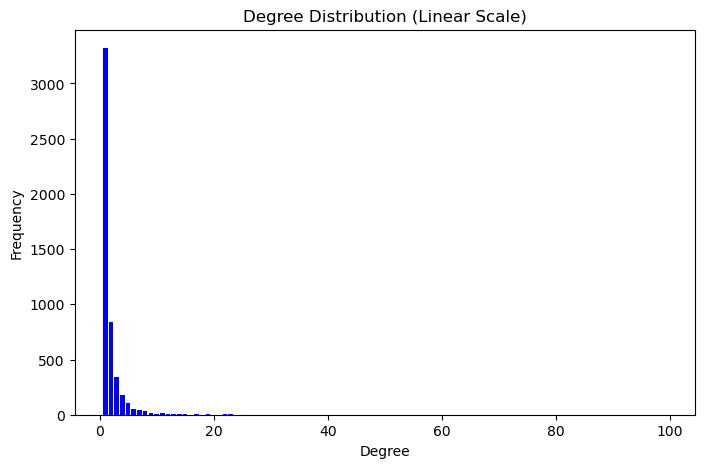

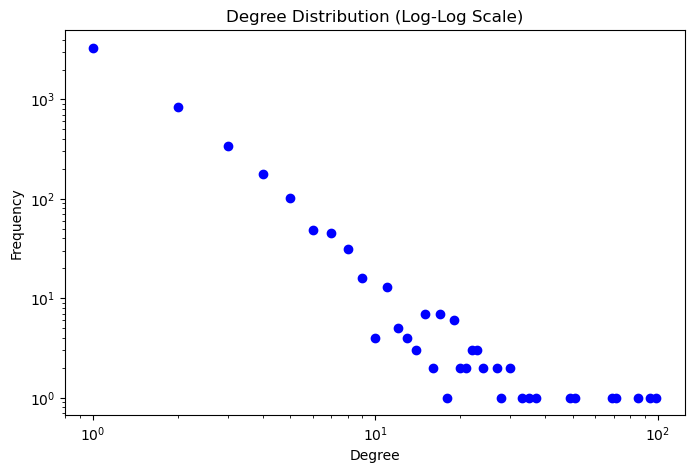

In [8]:
import numpy as np

# Get the degree of each node
degrees = [degree for node, degree in G.degree()]

# Calculate max and min degree
max_degree = np.max(degrees)
min_degree = np.min(degrees)
print(f"Maximum degree: {max_degree}, Minimum degree: {min_degree}")

# Bin the degree distribution using numpy.histogram
hist, bins = np.histogram(degrees, bins=np.arange(1, max(degrees)+2))

# Plot the degree distribution (Linear scale)
plt.figure(figsize=(8, 5))
plt.bar(bins[:-1], hist, width=0.8, color='blue')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Linear Scale)')
plt.show()

# Plot the degree distribution (Log-log scale)
plt.figure(figsize=(8, 5))
plt.loglog(bins[:-1], hist, marker='o', linestyle='None', color='blue')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution (Log-Log Scale)')
plt.show()


# Friendship paradox

The friendship paradox states that almost everyone has fewer friends than their friends have, on average. In this section, we will explore whether the friendship paradox holds in a Barabási-Albert (BA) network of 5000 nodes, which we will call F-BA (Friendship BA network). We will randomly select a node `i`, check its degree, and compare it with the average degree of its neighbors to see how often the paradox holds.
